In [12]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [13]:
X = np.array(range(1,100)).astype(np.float32)

X = tf.constant(X)
X.dtype

tf.float32

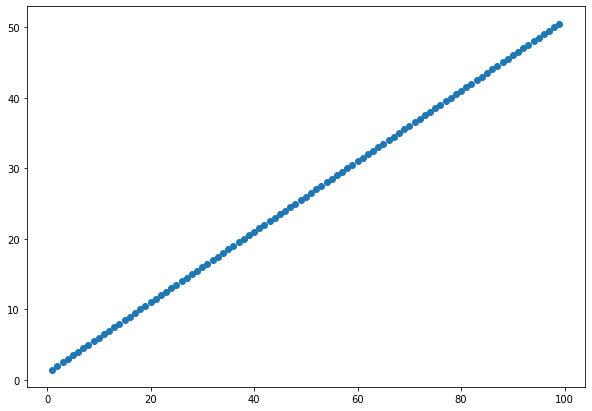

In [14]:
y = tf.constant(0.5*X+1)
plt.figure(figsize=(10,7))
plt.scatter(X,y)

In [15]:
X[0], y[0]

(<tf.Tensor: shape=(), dtype=float32, numpy=1.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1.5>)

In [34]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import mae, mse
from tensorflow.keras.optimizers import SGD, Adam

tf.random.set_seed(49)

model = Sequential(
    [
        Dense(10), 
        Dense(1)
    ]
)

model.compile(
    loss = mae,
    optimizer = SGD(), 
    metrics = [mae,mse]
)

In [35]:
history = model.fit(X, y, epochs=5)

Epoch 1/5
4/4 [==============================] - 0s 1ms/step - loss: 26.0255 - mean_absolute_error: 26.0255 - mean_squared_error: 1403.9811
Epoch 2/5
4/4 [==============================] - 0s 667us/step - loss: 15.8066 - mean_absolute_error: 15.8066 - mean_squared_error: 431.1795
Epoch 3/5
4/4 [==============================] - 0s 667us/step - loss: 15.0518 - mean_absolute_error: 15.0518 - mean_squared_error: 347.3870
Epoch 4/5
4/4 [==============================] - 0s 667us/step - loss: 13.3148 - mean_absolute_error: 13.3148 - mean_squared_error: 332.4873
Epoch 5/5
4/4 [==============================] - 0s 667us/step - loss: 18.8626 - mean_absolute_error: 18.8626 - mean_squared_error: 484.0383


In [36]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [37]:
y_hat = model.predict([20])

y[20], y_hat

(<tf.Tensor: shape=(), dtype=float32, numpy=11.5>,
 array([[6.722017]], dtype=float32))

In [38]:
X_train = X[:80]
y_train = y[:80]

X_test = X[80:]
y_test = y[80:]

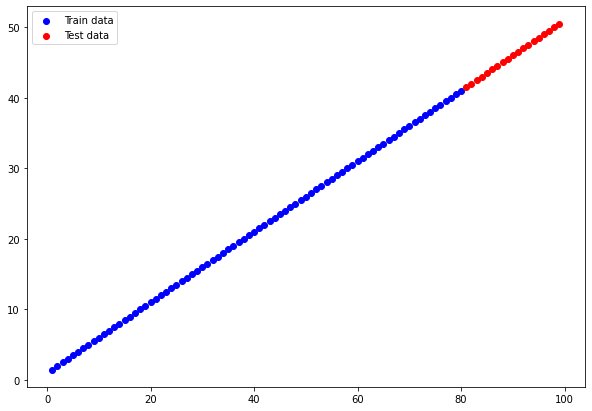

In [46]:
plt.figure(figsize=(10,7))
plt.scatter(X_train,y_train, c='b', label='Train data')
plt.scatter(X_test,y_test, c='r', label='Test data')
plt.legend()

In [44]:
tf.random.set_seed(49)

model2 = Sequential(
    [
        Dense(10), 
        Dense(1)
    ]
)

model2.compile(
    loss = mae,
    optimizer = SGD(), 
    metrics = [mae,mse]
)

In [45]:
history2 = model2.fit(X_train,y_train,
            validation_data=(X_test,y_test),
            epochs=5)

Epoch 1/5
3/3 [==============================] - 0s 38ms/step - loss: 19.2378 - mean_absolute_error: 19.2378 - mean_squared_error: 703.6271 - val_loss: 62.0948 - val_mean_absolute_error: 62.0948 - val_mean_squared_error: 3870.4968
Epoch 2/5
3/3 [==============================] - 0s 8ms/step - loss: 17.3382 - mean_absolute_error: 17.3382 - mean_squared_error: 537.5012 - val_loss: 46.8533 - val_mean_absolute_error: 46.8533 - val_mean_squared_error: 2203.0215
Epoch 3/5
3/3 [==============================] - 0s 7ms/step - loss: 13.7532 - mean_absolute_error: 13.7532 - mean_squared_error: 274.0124 - val_loss: 28.4501 - val_mean_absolute_error: 28.4501 - val_mean_squared_error: 812.2010
Epoch 4/5
3/3 [==============================] - 0s 7ms/step - loss: 9.8215 - mean_absolute_error: 9.8215 - mean_squared_error: 186.1229 - val_loss: 21.3213 - val_mean_absolute_error: 21.3213 - val_mean_squared_error: 456.1305
Epoch 5/5
3/3 [==============================] - 0s 8ms/step - loss: 6.8126 - mean_

In [51]:
y_hat = model.predict(X_test)
y_hat2 = model2.predict(X_test)


Text(0.5, 1.0, 'Model2 res')

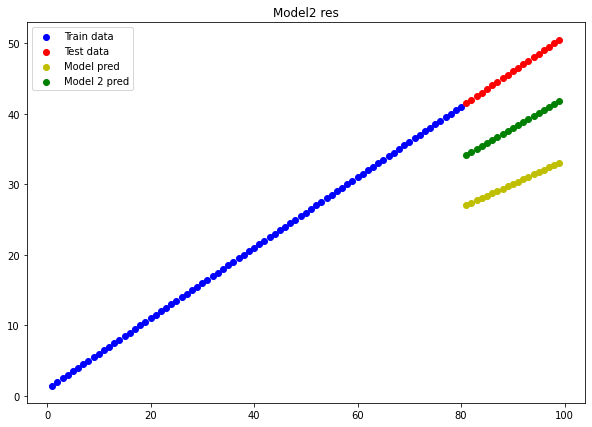

In [52]:
plt.figure(figsize=(10,7))
plt.scatter(X_train,y_train, c='b', label='Train data')
plt.scatter(X_test,y_test, c='r', label='Test data')
plt.scatter(X_test,y_hat, c='y', label='Model pred')
plt.scatter(X_test,y_hat2, c='g', label='Model 2 pred')
plt.legend()
plt.title('Model2 res')

<AxesSubplot:>

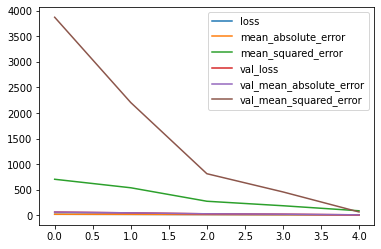

In [54]:
import pandas as pd
pd.DataFrame(history2.history).plot()

In [55]:
model3 = model2 

history3 = model3.fit(X_train,y_train,
            validation_data=(X_test,y_test),
            epochs=50,
            batch_size=32,#колво рядков
            verbose=0)#вывод да или нет

<AxesSubplot:>

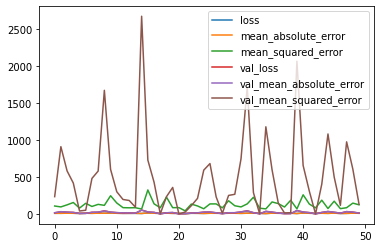

In [56]:
pd.DataFrame(history3.history).plot()